# Import Library 

In [1]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import re
import string
import swifter
import nltk
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_excel('tweetscrape.xlsx', usecols=['Date', 'Username', 'Tweet'])
df

Date         Username  \
0   2022-01-14 02:21:20+00:00   aktualofficial   
1   2022-01-13 16:56:05+00:00   Konfrontasi_co   
2   2022-01-13 07:04:57+00:00    wartakotalive   
3   2022-04-22 03:50:47+00:00     bergeloralah   
4   2022-04-22 03:39:09+00:00  MartinusButarb1   
..                        ...              ...   
95  2022-05-02 09:37:19+00:00     supriatna_sh   
96  2022-05-01 03:50:36+00:00     sammberkilat   
97  2022-05-02 10:35:42+00:00  Sunarto96672711   
98  2022-05-02 03:06:06+00:00           a_oumo   
99  2022-05-05 03:02:25+00:00  kontenislam_com   

                                                Tweet  
0   PKS Tolak Wacana Tunda Pemilu 2024 https://t.c...  
1   PKS Tegaskan Tolak Usulan Tunda Pemilu dan Per...  
2   Muncul Ide Tunda Pemilu, KSPSI: Jangan Lempar ...  
3   BAWA ASPIRASI RAKYAT..! PKB ke Megawati: Izink...  
4   Ga punya stok wacana yg lebih cerdas mas?\n\nP...  
..                                                ...  
95  @Wisnubrata6 Sampah...otak.kosong. sdh jelas m...  
96  Awas Provokasi soal tunda Pemilu https://t.co/...  
97  @Fahrihamzah Karena  politikus busuk yg jadi k...  
98  @CNNIndonesia Orang ini ga jelas, mau nyalon, ...  
99  Satyo Purwanto: PKB Akan Terkena Badai Kekecew...  

[100 rows x 3 columns]

# Tahapan Preproccesing

# Case Folding & Cleansing

In [3]:
# Proses Case Folding & Cleansing

def cleansing(Tweet):
    
    # Menghapus RT (Retweet)
    tw1 = re.sub('RT\s', '', Tweet)
    # Mengahpus tag @-username
    tw2 = re.sub('\B@\w+', '', tw1)
    # Mengahpus URL 
    tw3 = re.sub('(http|https):\/\/\S+', '', tw2)
    # Menghapus hastag (#)
    tw4 = re.sub("#[A-Za-z0-9_]+","", tw3)
    # Case Folding
    tw5 = tw4.lower()
    # Menghapus kata yang berulang
    tw6 = re.sub(r'(.)\1+', r'\1\1', tw5)
    # Menghapus tanda baca yang berulang
    tw7 = re.sub(r'[\?\.\!]+(?=[\?.\!])', '', tw6)
    # Menghapus angka atau karakter (hanya alphabet saja yang diambil)
    tw8 = re.sub(r'[^a-zA-Z]', ' ', tw7)
    return tw8

In [4]:
for i, r in df.iterrows():
    y = cleansing(r['Tweet'])
    df.loc[i, 'Tweet'] = y
    
df.head()

Date         Username  \
0  2022-01-14 02:21:20+00:00   aktualofficial   
1  2022-01-13 16:56:05+00:00   Konfrontasi_co   
2  2022-01-13 07:04:57+00:00    wartakotalive   
3  2022-04-22 03:50:47+00:00     bergeloralah   
4  2022-04-22 03:39:09+00:00  MartinusButarb1   

                                               Tweet  
0                pks tolak wacana tunda pemilu        
1  pks tegaskan tolak usulan tunda pemilu dan per...  
2  muncul ide tunda pemilu  kspsi  jangan lempar ...  
3  bawa aspirasi rakyat  pkb ke megawati  izinkan...  
4  ga punya stok wacana yg lebih cerdas mas   pkb...

In [5]:
df.to_excel('tweetbersih.xlsx', index=False)

In [6]:
df = pd.read_excel('tweetbersih.xlsx')
df.head()

Date         Username  \
0  2022-01-14 02:21:20+00:00   aktualofficial   
1  2022-01-13 16:56:05+00:00   Konfrontasi_co   
2  2022-01-13 07:04:57+00:00    wartakotalive   
3  2022-04-22 03:50:47+00:00     bergeloralah   
4  2022-04-22 03:39:09+00:00  MartinusButarb1   

                                               Tweet  
0                pks tolak wacana tunda pemilu        
1  pks tegaskan tolak usulan tunda pemilu dan per...  
2  muncul ide tunda pemilu  kspsi  jangan lempar ...  
3  bawa aspirasi rakyat  pkb ke megawati  izinkan...  
4  ga punya stok wacana yg lebih cerdas mas   pkb...

# Tokenization

In [7]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
# Tokenization

def tokenization(text):
    return word_tokenize(text)
df['Tokenize'] = df['Tweet'].apply(tokenization)
df.head()

Date         Username  \
0  2022-01-14 02:21:20+00:00   aktualofficial   
1  2022-01-13 16:56:05+00:00   Konfrontasi_co   
2  2022-01-13 07:04:57+00:00    wartakotalive   
3  2022-04-22 03:50:47+00:00     bergeloralah   
4  2022-04-22 03:39:09+00:00  MartinusButarb1   

                                               Tweet  \
0                pks tolak wacana tunda pemilu         
1  pks tegaskan tolak usulan tunda pemilu dan per...   
2  muncul ide tunda pemilu  kspsi  jangan lempar ...   
3  bawa aspirasi rakyat  pkb ke megawati  izinkan...   
4  ga punya stok wacana yg lebih cerdas mas   pkb...   

                                            Tokenize  
0                [pks, tolak, wacana, tunda, pemilu]  
1  [pks, tegaskan, tolak, usulan, tunda, pemilu, ...  
2  [muncul, ide, tunda, pemilu, kspsi, jangan, le...  
3  [bawa, aspirasi, rakyat, pkb, ke, megawati, iz...  
4  [ga, punya, stok, wacana, yg, lebih, cerdas, m...

# Stop-word Removal

In [9]:
nltk.download('stopwords')
from nltk.corpus import stopwords
print(set(stopwords.words('Indonesian')))

{'suatu', 'sudahlah', 'biasanya', 'tiba', 'mengingatkan', 'diketahuinya', 'per', 'sesekali', 'dipergunakan', 'disini', 'agak', 'sesegera', 'terus', 'kepada', 'tampaknya', 'semacam', 'semata-mata', 'dimungkinkan', 'mempersiapkan', 'amat', 'wong', 'dari', 'bermula', 'sana', 'seharusnya', 'bukannya', 'sudah', 'mengibaratkannya', 'mengapa', 'terakhir', 'setiba', 'telah', 'hingga', 'mendapat', 'memang', 'ibu', 'secukupnya', 'akhiri', 'menaiki', 'tutur', 'bermacam', 'besar', 'saya', 'disebutkan', 'setinggi', 'begitulah', 'kedua', 'nah', 'sepihak', 'semisal', 'serupa', 'dan', 'diperlukannya', 'mengibaratkan', 'benarlah', 'boleh', 'sewaktu', 'tanyakan', 'bersama-sama', 'tuturnya', 'hendaknya', 'ketika', 'menyatakan', 'kecil', 'sepanjang', 'sebegitu', 'diketahui', 'mendatangi', 'pastilah', 'bukan', 'cukup', 'katakanlah', 'aku', 'tidaklah', 'datang', 'akhir', 'sebetulnya', 'empat', 'lah', 'masa', 'pertanyaan', 'sebagainya', 'pernah', 'menunjukkan', 'sekarang', 'bukankah', 'kembali', 'sendiri', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
# StopWord Removal

# ----------------------- get stopword from NLTK stopword -------------------------------
# get stopword indonesia
list_stopwords = stopwords.words('indonesian')


# ---------------------------- manualy add stopword  ------------------------------------
# append additional stopword
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo','kalo', 'amp', 'biar', 'bikin', 'bilang','gak', 'ga', 'krn', 'nya', 'nih', 'sih', 'si', 
                       'tau', 'tdk', 'tuh', 'utk', 'ya', 'jd', 'jgn', 'sdh', 'aja', 'n', 't','nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt','&amp', 'yah',
                       'pemilu', 'jokowi', 'amati', 'hai', 'petakan', 'ad', 'kpu', 'cobak', 'alasannya', 'covid', 'knp', 'ikn', 'jalan', 'bangun', 'panjang', 
                       'ketum', 'kadin', 'jaktim', 'anta', 'ginting', 'omicron', 'indonesia', 'kaesang', 'gibran', 'batubara', 'banjir', 'dipapua', 'tol', 
                       'garuda', 'berita', 'artis', 'narkoba', 'barisan', 'sok', 'ngide', 'orang', 'jorokin', 'pakde', 'udah', 'ngomong', 'periode', 'pks',
                       'kspsi', 'pilpres', 'bahlil', 'tweps', 'perpanjangan', 'jabatan', 'memperpanjang', 'parpol', 'pp', 'bkpm', 'wasekjen', 'demokrat', 'bener',
                       'jadi', 'mentri', 'gara', 'pengusahan', 'kalahari', 'pemilunya', 'spt', 'jagoan', 'mempertahankan', 'akal', 'akalan', 'pembangunan',
                       'kejadian', 'cofad', 'cofid', 'taipan', 'pilkada', 'dki', 'karna', 'plt', 'eeh', 'loe', 'alasan', 'gua', 'demen', 'bahlul', 'sekelas', 'amerika',
                       'istilah', 'silam', 'melontarkan', 'klw', 'silahkan', 'relevan', 'politik', 'org', 'parte', 'bpjs', 'toa', 'jht', 'sembako', 'langka',
                       'keuangan', 'kesehatan', 'digadai', 'agama', 'diadu', 'pasokan', 'makanan', 'ditimbun', 'pemerintahan', 'dikendalikan', 'persemakmuran',
                       'pindah', 'adu', 'lini', 'bersatulah', 'mui', 'tentang', 'syariat', 'islam', 'aturan', 'tentu', 'negara', 'kebijakan', 'pengusaha',
                       'said', 'iqbal', 'bentuk', 'menentang', 'mending', 'wcana', 'dasarnya', 'eh', 'muhaimin', 'kali', 'kau', 'ah', 'nggak', 'mikirin', 'wajib',
                       'bayaran', 'alias', 'bazzerp', 'tunjukkan', 'tai', 'percepat', 'terjual', 'hutang', 'ngga', 'buka', 'nongkrong', 'tongkrongan', 'esok', 'kiai', 'bang',
                       'trus', 'bubarin', 'abis', 'pejabat', 'permintaan', 'tinggal', 'minggu', 'februari', 'nurhayati', 'ukraina', 'risma', 'menag', 'an', 'doakan', 'urusan', 'pemerintah', 'jualan', 'satyo', 'purwanto', 'terkena',
                       'wirda', 'universitas', 'padjadjaran', 'muhammadiyah', 'cak', 'imin', 'meninggal', 'perludem', 'rubah', 'hrs', 'dibiarkan', 'tsb', 'sutradaranya', 'ikuti', 'berjubel', 'kondunsif', 'manfaatkan', 'habis', 'berharap', 'blak', 'blakan', 'disanalah', 'mewakili', 'dedengkot',
                       'psl', 'uud', 'nri', 'kpd', 'temui', 'gus', 'diajukan', 'lahadila', 'th', 'national', 'gue', 'blom', 'yuk', 'kepemuliahan', 'opung', 'sepuh', 'dasar', 'diberlakukan', 'wahid', 'menggoreng', 'sy', 'membangun', 'jadwal', 'chaos', 'sutradara', 'kl', 'emang', 'juta',
                       'coba', 'bersaing', 'terpancing', 'doa', 'diselesaikan', 'wakanda', 'refresh', 'mata', 'guys', 'sm', 'jubel', 'ikut', 'scr', 'instan', 'kadrun', 'mahasewa', 'lakukan', 'demo', 'pancing', 'pkb', 'megawati', 'stok', 'mas', 'ni', 'masuk', 'skrang', 'dimasuki', 'isis',
                       'wapres', 'ma', 'ruf', 'amin', 'cakimin', 'namanya', 'tetep', 'dpr', 'wakil', 'didemo', 'ngapain', 'sana', 'bertarung', 'mania', 'main', 'oh', 'iya', 'sepak', 'bola', 'budaya', 'liga', 'pereode', 'bergulir', 'tka', 'berlakulah', 'asik', 'ngusulin', 'hati', 'pemangku', 'pdhl', 'lbp', 'kepingin', 'spy', 'ngaco', 'kebo', 'kardus', 'durian', 'poitik', 'dicocok', 'hidungnya', 'salah', 'lbih', 'et', 'mencoba', 'konsitusi', 'jagat', 'calon', 'tunggal', 'ilmu', 'komporgas', 'duduki', 'kehilangan', 'tampa', 'mementingkan', 'x', 'mafia', 'migoreng', 'bantu', 'nyalon', 'pengen', 'prabowo', 'istana', 'selesai', 'nawarin', 'bangke', 'hoby', 'nyolong', 'dana'])

#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

df['StopWord'] = df['Tokenize'].apply(stopwords_removal) 
df.head()

Date         Username  \
0  2022-01-14 02:21:20+00:00   aktualofficial   
1  2022-01-13 16:56:05+00:00   Konfrontasi_co   
2  2022-01-13 07:04:57+00:00    wartakotalive   
3  2022-04-22 03:50:47+00:00     bergeloralah   
4  2022-04-22 03:39:09+00:00  MartinusButarb1   

                                               Tweet  \
0                pks tolak wacana tunda pemilu         
1  pks tegaskan tolak usulan tunda pemilu dan per...   
2  muncul ide tunda pemilu  kspsi  jangan lempar ...   
3  bawa aspirasi rakyat  pkb ke megawati  izinkan...   
4  ga punya stok wacana yg lebih cerdas mas   pkb...   

                                            Tokenize  \
0                [pks, tolak, wacana, tunda, pemilu]   
1  [pks, tegaskan, tolak, usulan, tunda, pemilu, ...   
2  [muncul, ide, tunda, pemilu, kspsi, jangan, le...   
3  [bawa, aspirasi, rakyat, pkb, ke, megawati, iz...   
4  [ga, punya, stok, wacana, yg, lebih, cerdas, m...   

                                            StopWord  
0                             [tolak, wacana, tunda]  
1         [tegaskan, tolak, usulan, tunda, presiden]  
2  [muncul, ide, tunda, lempar, wacana, gaduh, bu...  
3  [bawa, aspirasi, rakyat, izinkan, hormat, lanj...  
4  [wacana, cerdas, izinkan, hormat, lanjutkan, w...

# Stemming

In [11]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

In [12]:
# Stemming

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in df['StopWord']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
#print(len(term_dict))
#print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    #print(term,":" ,term_dict[term])
    
#print(term_dict)
#print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

df['Stemming'] = df['StopWord'].swifter.apply(get_stemmed_term)
df.head()

Pandas Apply:   0%|          | 0/100 [00:00<?, ?it/s]

Date         Username  \
0  2022-01-14 02:21:20+00:00   aktualofficial   
1  2022-01-13 16:56:05+00:00   Konfrontasi_co   
2  2022-01-13 07:04:57+00:00    wartakotalive   
3  2022-04-22 03:50:47+00:00     bergeloralah   
4  2022-04-22 03:39:09+00:00  MartinusButarb1   

                                               Tweet  \
0                pks tolak wacana tunda pemilu         
1  pks tegaskan tolak usulan tunda pemilu dan per...   
2  muncul ide tunda pemilu  kspsi  jangan lempar ...   
3  bawa aspirasi rakyat  pkb ke megawati  izinkan...   
4  ga punya stok wacana yg lebih cerdas mas   pkb...   

                                            Tokenize  \
0                [pks, tolak, wacana, tunda, pemilu]   
1  [pks, tegaskan, tolak, usulan, tunda, pemilu, ...   
2  [muncul, ide, tunda, pemilu, kspsi, jangan, le...   
3  [bawa, aspirasi, rakyat, pkb, ke, megawati, iz...   
4  [ga, punya, stok, wacana, yg, lebih, cerdas, m...   

                                            StopWord  \
0                             [tolak, wacana, tunda]   
1         [tegaskan, tolak, usulan, tunda, presiden]   
2  [muncul, ide, tunda, lempar, wacana, gaduh, bu...   
3  [bawa, aspirasi, rakyat, izinkan, hormat, lanj...   
4  [wacana, cerdas, izinkan, hormat, lanjutkan, w...   

                                            Stemming  
0                             [tolak, wacana, tunda]  
1              [tegas, tolak, usul, tunda, presiden]  
2  [muncul, ide, tunda, lempar, wacana, gaduh, bu...  
3  [bawa, aspirasi, rakyat, izin, hormat, lanjut,...  
4  [wacana, cerdas, izin, hormat, lanjut, wacana,...

In [13]:
def remove_punct(text):
    text = " ".join([char for char in text if char not in string.punctuation])
    return text

In [14]:
df['Tweet Preprocessing'] = df['Stemming'].apply(lambda x: remove_punct(x))
df.head()

Date         Username  \
0  2022-01-14 02:21:20+00:00   aktualofficial   
1  2022-01-13 16:56:05+00:00   Konfrontasi_co   
2  2022-01-13 07:04:57+00:00    wartakotalive   
3  2022-04-22 03:50:47+00:00     bergeloralah   
4  2022-04-22 03:39:09+00:00  MartinusButarb1   

                                               Tweet  \
0                pks tolak wacana tunda pemilu         
1  pks tegaskan tolak usulan tunda pemilu dan per...   
2  muncul ide tunda pemilu  kspsi  jangan lempar ...   
3  bawa aspirasi rakyat  pkb ke megawati  izinkan...   
4  ga punya stok wacana yg lebih cerdas mas   pkb...   

                                            Tokenize  \
0                [pks, tolak, wacana, tunda, pemilu]   
1  [pks, tegaskan, tolak, usulan, tunda, pemilu, ...   
2  [muncul, ide, tunda, pemilu, kspsi, jangan, le...   
3  [bawa, aspirasi, rakyat, pkb, ke, megawati, iz...   
4  [ga, punya, stok, wacana, yg, lebih, cerdas, m...   

                                            StopWord  \
0                             [tolak, wacana, tunda]   
1         [tegaskan, tolak, usulan, tunda, presiden]   
2  [muncul, ide, tunda, lempar, wacana, gaduh, bu...   
3  [bawa, aspirasi, rakyat, izinkan, hormat, lanj...   
4  [wacana, cerdas, izinkan, hormat, lanjutkan, w...   

                                            Stemming  \
0                             [tolak, wacana, tunda]   
1              [tegas, tolak, usul, tunda, presiden]   
2  [muncul, ide, tunda, lempar, wacana, gaduh, bu...   
3  [bawa, aspirasi, rakyat, izin, hormat, lanjut,...   
4  [wacana, cerdas, izin, hormat, lanjut, wacana,...   

                                 Tweet Preprocessing  
0                                 tolak wacana tunda  
1                    tegas tolak usul tunda presiden  
2   muncul ide tunda lempar wacana gaduh buruh tolak  
3  bawa aspirasi rakyat izin hormat lanjut wacana...  
4      wacana cerdas izin hormat lanjut wacana tunda

In [15]:
df.to_excel('preproccesing.xlsx', index=False)

In [16]:
df.drop(df.columns[[0,1,2,3,4,5]], axis = 1, inplace = True)
df.head()

Tweet Preprocessing
0                                 tolak wacana tunda
1                    tegas tolak usul tunda presiden
2   muncul ide tunda lempar wacana gaduh buruh tolak
3  bawa aspirasi rakyat izin hormat lanjut wacana...
4      wacana cerdas izin hormat lanjut wacana tunda

In [17]:
df.to_excel('tweet.xlsx')

# Data Tweet Hasil Pelabelan

In [18]:
df = pd.read_excel('tweetlabelling.xlsx', usecols=['Tweet Preprocessing', 'Label', 'Sentimen'])
df

Tweet Preprocessing  Label Sentimen
0                                  tolak wacana tunda     -1  Negatif
1                     tegas tolak usul tunda presiden     -1  Negatif
2    muncul ide tunda lempar wacana gaduh buruh tolak     -1  Negatif
3   bawa aspirasi rakyat izin hormat lanjut wacana...      1  Positif
4       wacana cerdas izin hormat lanjut wacana tunda      1  Positif
..                                                ...    ...      ...
95               sampah otak kosong usul tunda sampah     -1  Negatif
96                               awas provokasi tunda     -1  Negatif
97  politikus busuk ide tunda presiden jiwa watak ...     -1  Negatif
98                         tunda konflik hindar hukum     -1  Negatif
99        badai kecewa masyarakat akibat dukung tunda     -1  Negatif

[100 rows x 3 columns]

# Hitung Data

In [19]:
hitung = df.Sentimen.value_counts()
hitung

Negatif    60
Positif    40
Name: Sentimen, dtype: int64

# Visualisasi Data

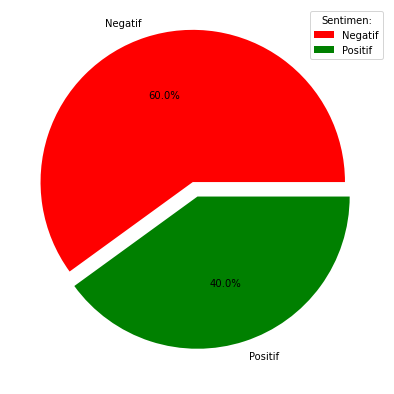

In [20]:
# Visualisasi Persentase Data
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,7))
mycolors = ["red", "green"]
plt.pie(hitung.values, labels = hitung.index, explode=(0.10,0), colors = mycolors, autopct = '%1.1f%%', shadow = False)
plt.legend(title = "Sentimen:")
plt.savefig("piesentimen.png", dpi=300)
plt.show()

In [21]:
df.to_csv('tweetfix.csv', index=False)
tweetfix = pd.read_csv('tweetfix.csv')
tweetfix

Tweet Preprocessing  Label Sentimen
0                                  tolak wacana tunda     -1  Negatif
1                     tegas tolak usul tunda presiden     -1  Negatif
2    muncul ide tunda lempar wacana gaduh buruh tolak     -1  Negatif
3   bawa aspirasi rakyat izin hormat lanjut wacana...      1  Positif
4       wacana cerdas izin hormat lanjut wacana tunda      1  Positif
..                                                ...    ...      ...
95               sampah otak kosong usul tunda sampah     -1  Negatif
96                               awas provokasi tunda     -1  Negatif
97  politikus busuk ide tunda presiden jiwa watak ...     -1  Negatif
98                         tunda konflik hindar hukum     -1  Negatif
99        badai kecewa masyarakat akibat dukung tunda     -1  Negatif

[100 rows x 3 columns]

In [22]:
tweetfix = tweetfix.astype({'Tweet Preprocessing' : 'string'})
tweetfix = tweetfix.astype({'Label' : 'category'})
tweetfix = tweetfix.astype({'Sentimen' : 'category'})
tweetfix.dtypes

Tweet Preprocessing      string
Label                  category
Sentimen               category
dtype: object

# Proses TF-IDF

In [23]:
#TF-IDF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

tvec = CountVectorizer()
X_cVec = tvec.fit_transform(tweetfix['Tweet Preprocessing'].values.astype('U'))
print(X_cVec)
h_tfidf = TfidfTransformer()
x_tfidf = h_tfidf.fit_transform(X_cVec)

  (0, 172)	1
  (0, 186)	1
  (0, 177)	1
  (1, 172)	1
  (1, 177)	1
  (1, 163)	1
  (1, 184)	1
  (1, 124)	1
  (2, 172)	1
  (2, 186)	1
  (2, 177)	1
  (2, 97)	1
  (2, 60)	1
  (2, 85)	1
  (2, 41)	1
  (2, 20)	1
  (3, 186)	1
  (3, 177)	1
  (3, 16)	1
  (3, 6)	1
  (3, 130)	1
  (3, 64)	1
  (3, 58)	1
  (3, 83)	1
  (4, 186)	2
  :	:
  (95, 107)	1
  (95, 79)	1
  (96, 177)	1
  (96, 125)	1
  (96, 7)	1
  (97, 177)	1
  (97, 124)	1
  (97, 60)	1
  (97, 130)	1
  (97, 121)	1
  (97, 22)	1
  (97, 67)	1
  (97, 189)	1
  (97, 105)	1
  (97, 155)	1
  (98, 177)	1
  (98, 75)	1
  (98, 59)	1
  (98, 56)	1
  (99, 177)	1
  (99, 36)	1
  (99, 92)	1
  (99, 9)	1
  (99, 70)	1
  (99, 2)	1


# Split Data

In [24]:
# split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_tfidf, tweetfix['Sentimen'], test_size=0.2, random_state = 42)

# Klasifikasi Model SVM

In [25]:
# Klasifikasi SVM
from sklearn.svm import SVC

modelSVM = SVC(kernel='linear').fit(X_train, y_train)
predicted = modelSVM.predict(X_test)

# Pengujian Model SVM

In [26]:
# Pengujian Akurasi Model SVM
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print("SVM Accuracy:" , accuracy_score(y_test,predicted))
print("SVM Precision:" , precision_score(y_test,predicted, average="binary", pos_label="Negatif"))
print("SVM Recall:" , recall_score(y_test,predicted, average="binary", pos_label="Negatif"))
print("SVM f1_score:" , f1_score(y_test,predicted, average="binary", pos_label="Negatif"))

print(f'confusion matrix:\n {confusion_matrix(y_test, predicted)}')
print('========================================================')
print(classification_report(y_test, predicted, zero_division=0))

SVM Accuracy: 0.9
SVM Precision: 0.9166666666666666
SVM Recall: 0.9166666666666666
SVM f1_score: 0.9166666666666666
confusion matrix:
 [[11  1]
 [ 1  7]]
              precision    recall  f1-score   support

     Negatif       0.92      0.92      0.92        12
     Positif       0.88      0.88      0.88         8

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20



# Visualisasi Confusion Matrix

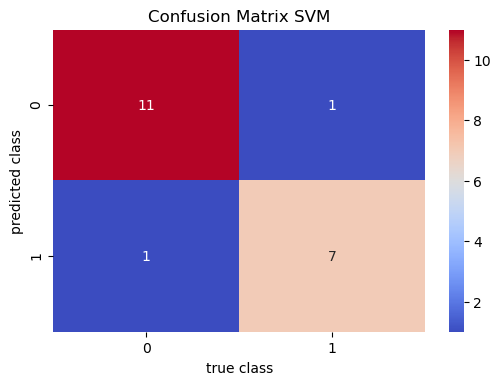

In [27]:
# Visualisasi Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(dpi=100)
svm = confusion_matrix(y_test,predicted)
sns.heatmap(svm.T, annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix SVM')
plt.xlabel('true class')
plt.ylabel('predicted class')
plt.savefig("confusion.png", dpi=300)
plt.show()

# Visualisasi Wordcloud

In [28]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import numpy as np

In [29]:
df = pd.read_csv("tweetfix.csv")
df

Tweet Preprocessing  Label Sentimen
0                                  tolak wacana tunda     -1  Negatif
1                     tegas tolak usul tunda presiden     -1  Negatif
2    muncul ide tunda lempar wacana gaduh buruh tolak     -1  Negatif
3   bawa aspirasi rakyat izin hormat lanjut wacana...      1  Positif
4       wacana cerdas izin hormat lanjut wacana tunda      1  Positif
..                                                ...    ...      ...
95               sampah otak kosong usul tunda sampah     -1  Negatif
96                               awas provokasi tunda     -1  Negatif
97  politikus busuk ide tunda presiden jiwa watak ...     -1  Negatif
98                         tunda konflik hindar hukum     -1  Negatif
99        badai kecewa masyarakat akibat dukung tunda     -1  Negatif

[100 rows x 3 columns]

In [30]:
word = " ".join(tweet for tweet in df['Tweet Preprocessing'])

In [31]:
twitter_mask = np.array(Image.open('Twitter.png'))

In [32]:
font = 'Fonts/Quicksand Medium 500.ttf'
word_cloud1 = WordCloud(
        font_path=font,
        width=5000,
        height=3000,
        max_words=500,
        colormap='brg',
        random_state=42,
        background_color="white",
        mask=twitter_mask,
        collocations=False,
        stopwords=STOPWORDS,
        ).generate(word)

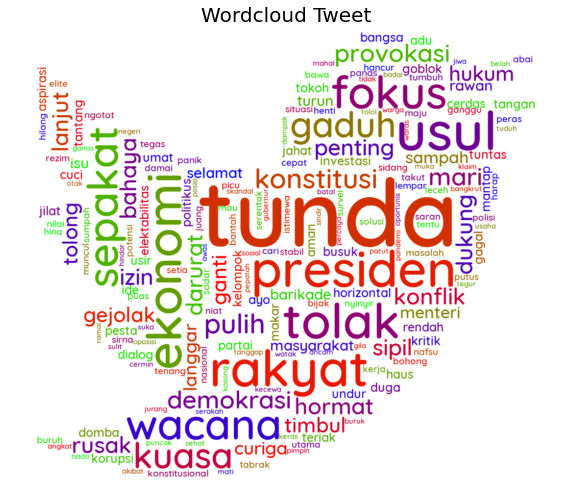

In [33]:
plt.figure(figsize=(10,10))
plt.title('Wordcloud Tweet', fontsize = 20)
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis("off")
plt.savefig("wordcloud.png", dpi=300)
plt.show()

# Wordcloud Positif

In [34]:
wordpos = " ".join(tweet for tweet in df['Tweet Preprocessing'][df['Sentimen'] == 'Positif'])

In [35]:
twitter_mask = np.array(Image.open('upvote.png'))

In [36]:
font = 'Fonts/Quicksand Medium 500.ttf'
word_pos = WordCloud(
        font_path=font,
        width=5000,
        height=3000,
        max_words=500,
        colormap='winter',
        random_state=42,
        background_color="white",
        mask=twitter_mask,
        collocations=False,
        stopwords=STOPWORDS,
        ).generate(wordpos)

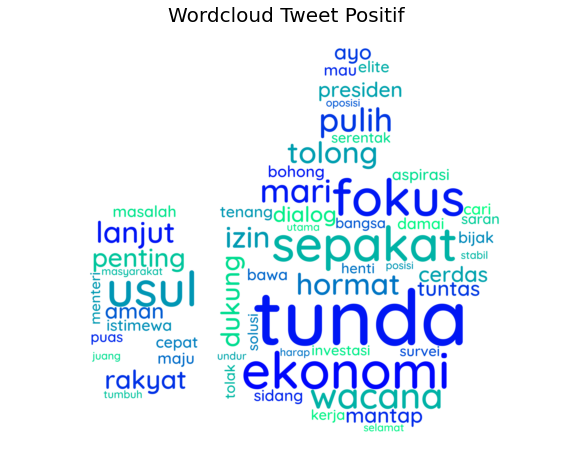

In [37]:
plt.figure(figsize=(10,10))
plt.title('Wordcloud Tweet Positif', fontsize = 20)
plt.imshow(word_pos, interpolation='bilinear')
plt.axis("off")
plt.savefig("wordpos.png", dpi=300)
plt.show()

# Wordcloud Negatif

In [38]:
wordneg = " ".join(tweet for tweet in df['Tweet Preprocessing'][df['Sentimen'] == 'Negatif'])

In [39]:
twitter_mask = np.array(Image.open('downvote.png'))

In [40]:
font = 'Fonts/Quicksand Medium 500.ttf'
word_neg = WordCloud(
        font_path=font,
        width=5000,
        height=3000,
        max_words=500,
        colormap='gist_heat',
        random_state=42,
        background_color="white",
        mask=twitter_mask,
        collocations=False,
        stopwords=STOPWORDS,
        ).generate(wordneg)

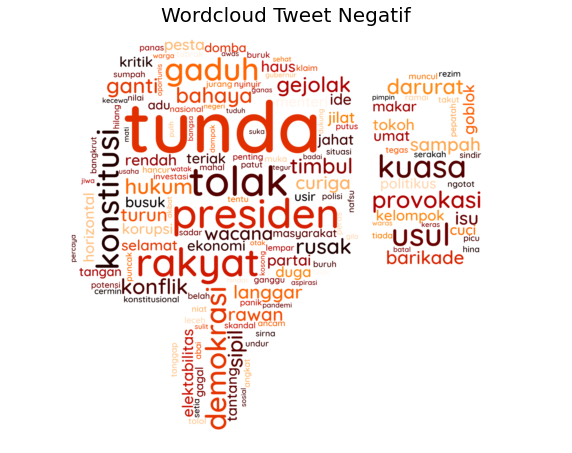

In [41]:
plt.figure(figsize=(10,10))
plt.title('Wordcloud Tweet Negatif', fontsize = 20)
plt.imshow(word_neg, interpolation='bilinear')
plt.axis("off")
plt.savefig("wordneg.png", dpi=300)
plt.show()